<div style="background-color: #f9fbe7; border: 2px solid #4caf50; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #4caf50; font-size: 22px;">Exercise 10</h2>
    <p>Complete the following tasks to practice and apply your skills on Hotel_booking dataset:</p>
    <ol style="list-style-type: decimal;">
        <li>Get and visualize informations.</li>
        <li>Apply preprocessing methods.</li>
        <li>Choose a classification method.</li>
        <li>Evaluate the chosen classifier.</li>
    </ol>
</div>

![pic1.jpg](pic1.jpg)

<div style="background-color: #f0f8ff; border: 2px solid #1e90ff; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #1e90ff; font-size: 20px;">Step 1: Get and visualize informations</h2>
    <ul style="list-style: none; padding-left: 0;">
    </ul>
</div>

<div style="background-color: #fdf5e6; border: 2px solid #ff6347; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #ff6347; font-size: 16px;">Import required libraries</h2>
</div>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

<div style="background-color: #fdf5e6; border: 2px solid #ff6347; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #ff6347; font-size: 16px;">Load and get informations</h2>
</div>

In [3]:
data = pd.read_csv('hotel_booking.csv')

In [4]:
data.head(3).T

,0,1,2
hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0
lead_time,342,737,7
arrival_date_year,2015,2015,2015
arrival_date_month,July,July,July
arrival_date_week_number,27,27,27
arrival_date_day_of_month,1,1,1
stays_in_weekend_nights,0,0,0
stays_in_week_nights,0,0,1
adults,2,2,1


<div style="background-color: #f4f4f4; border-left: 6px solid #4CAF50; padding: 10px; margin: 10px 0;">
    <h3 style="color: #4CAF50;">Hotel Booking Dataset Columns</h3>
    <ol style="list-style-type: decimal; padding-left: 20px;">
        <li><strong>hotel:</strong> Type of hotel (e.g., 'Resort Hotel' or 'City Hotel')</li>
        <li><strong>is_canceled:</strong> Booking cancellation status (0: Not canceled, 1: Canceled)</li>
        <li><strong>lead_time:</strong> Days between booking and arrival date</li>
        <li><strong>arrival_date_year:</strong> Year of arrival date (2015, 2016, and 2017)</li>
        <li><strong>arrival_date_month:</strong> Month of arrival date</li>
        <li><strong>arrival_date_week_number:</strong> Week number of arrival date</li>
        <li><strong>arrival_date_day_of_month:</strong> Day of the month of arrival date</li>
        <li><strong>stays_in_weekend_nights:</strong> Number of weekend nights planned</li>
        <li><strong>stays_in_week_nights:</strong> Number of weekday nights planned</li>
        <li><strong>adults:</strong> Number of adults in booking</li>
        <li><strong>children:</strong> Number of children in booking</li>
        <li><strong>babies:</strong> Number of babies in booking</li>
        <li><strong>meal:</strong> Meal plan type:
             <ol style="list-style-type: lower-alpha; padding-left: 20px;">
                <li><strong>BB:</strong> Bed and Breakfast - This typically includes a room stay along with breakfast for the guests.</li>
                <li><strong>FB:</strong> Full Board - This includes three meals a day (breakfast, lunch, and dinner) as part of the room rate.</li>
                <li><strong>HB:</strong> Half Board - This includes two meals a day (usually breakfast and dinner) as part of the room rate.</li>
                <li><strong>SC:</strong> Self Catering - Guests in this plan are expected to prepare their own meals. The hotel provides the necessary facilities and amenities.</li>
                <li><strong>Undefined:</strong> This likely represents cases where the meal plan information is missing or not properly defined.</li>
            </ol>
        </li>
        <li><strong>country:</strong> Country of guest origin</li>
         <li><strong>market_segment:</strong> Booking source:
             <ol style="list-style-type: lower-alpha; padding-left: 20px;">
                <li><strong>Direct:</strong> The booking was made directly with the hotel, often through their official website or phone.</li>
                <li><strong>Corporate:</strong> The booking was made by a corporate entity, usually for business travel purposes.</li>
                <li><strong>Online TA:</strong> The booking was made through an Online Travel Agent (OTA), which is a third-party platform for booking accommodations online.</li>
                <li><strong>Offline TA/TO:</strong> The booking was made through an offline Travel Agent or Tour Operator.</li>
                <li><strong>Complementary:</strong> The booking is complementary, often indicating a special arrangement such as for hotel staff or partners.</li>
                <li><strong>Groups:</strong> The booking is part of a larger group reservation, such as for tours or conferences.</li>
                <li><strong>Undefined:</strong> This likely represents cases where the booking source information is missing or not properly defined.</li>
                <li><strong>Aviation:</strong> The booking is associated with aviation-related activities or services.</li>
            </ol>
        </li>
        <li><strong>distribution_channel:</strong> Booking distribution channel:
            <ol style="list-style-type: lower-alpha; padding-left: 20px;">
                <li><strong>Direct:</strong> The booking was made directly through the hotel, often through their official website or phone.</li>
                <li><strong>Corporate:</strong> The booking was made by a corporate entity, usually for business travel purposes.</li>
                <li><strong>TA/TO:</strong> The booking was made through a Travel Agent (TA) or Tour Operator (TO).</li>
                <li><strong>Undefined:</strong> This likely represents cases where the distribution channel information is missing or not properly defined.</li>
                <li><strong>GDS:</strong> The booking was made through a Global Distribution System (GDS), which is a network used by travel agents to access real-time hotel and travel information.</li>
            </ol>
        </li>
        <li><strong>is_repeated_guest:</strong> Whether guest is a repeated guest (1: Yes, 0: No)</li>
        <li><strong>previous_cancellations:</strong> Number of previous cancellations by guest</li>
        <li><strong>previous_bookings_not_canceled:</strong> Number of previous non-canceled bookings by guest</li>
        <li><strong>reserved_room_type:</strong> Initial reserved room type, ['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B']</li>
        <li><strong>assigned_room_type:</strong> Actually assigned room type, ['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K']</li>
        <li><strong>booking_changes:</strong> Number of booking changes</li>
        <li><strong>deposit_type:</strong> Type of deposit made for booking
            <ol style="list-style-type: lower-alpha; padding-left: 20px;">
                <li><strong>No Deposit:</strong> This means that no deposit was required when making the booking. The guest's credit card information might have been taken for reservation purposes, but no initial payment was taken at the time of booking. Payment would usually be made upon check-in or check-out.</li>
                <li><strong>Refundable:</strong> This indicates that a refundable deposit was made. The guest pays an amount upfront, which is held by the hotel as security against potential damages or cancellations. If the guest cancels within the specified timeframe and conditions, this deposit might be fully or partially refundable.</li>
                <li><strong>Non Refund:</strong> This means that a non-refundable deposit was made. The guest pays an amount upfront, which is typically not refundable under any circumstances, even if the reservation is canceled.</li>
            </ol>
        </li>
        <li><strong>agent:</strong> Travel agency ID</li>
        <li><strong>company:</strong> Company/entity ID</li>
        <li><strong>days_in_waiting_list:</strong> Days in waiting list before confirmation</li>
        <li><strong>customer_type:</strong> The type of customers:
            <ol style="list-style-type: lower-alpha; padding-left: 20px;">
                <li><strong>Transient:</strong> This refers to individual guests who are not part of a group or any specific contract. These guests typically book their stays directly and independently.</li>
                <li><strong>Contract:</strong> This represents guests who have a contractual agreement with the hotel for their stay. This could include corporate clients or other entities that have negotiated special terms and rates with the hotel.</li>
                <li><strong>Transient-Party:</strong> This category is used for individual guests who are part of a larger transient group. It indicates that while they are booking independently, they are part of a group traveling together.</li>
                <li><strong>Group:</strong> This category is used for bookings that are part of a larger group reservation. These could include tour groups, conferences, or other organized events.</li>
            </ol>
        </li>
        <li><strong>adr:</strong> Average Daily Rate (room price)</li>
        <li><strong>required_car_parking_spaces:</strong> Number of required car parking spaces</li>
        <li><strong>total_of_special_requests:</strong> Total number of special requests</li>
        <li><strong>reservation_status:</strong>
            <ol style="list-style-type: lower-alpha; padding-left: 20px;">
                <li><strong>Check-Out:</strong> The guest has successfully completed their stay and checked out from the hotel.</li>
                <li><strong>Canceled:</strong> The reservation was canceled before the guest's stay. This could be due to guest request or other reasons.</li>
                <li><strong>No-Show:</strong> The guest did not arrive for the reservation and did not provide prior notice of cancellation.</li>
            </ol>
        </li>
        <li><strong>reservation_status_date:</strong> Date of reservation status update</li>
        <li><strong>name:</strong> Guest's name</li>
        <li><strong>email:</strong> Guest's email address</li>
        <li><strong>phone-number:</strong> Guest's phone number</li>
        <li><strong>credit_card:</strong> Payment method (e.g., 'Credit Card')</li>
    </ol>
</div>


In [5]:
def data_information(data):
    
    print("\033[1;41m"+'Informations:'+"\033[0m")
    print(13*'=')
    print(data.info())
    print(50*'-')
    
    print("\033[1;42m"+'Column names:'+"\033[0m")
    print(13*'=')
    print(data.columns)
    print(50*'-')
    
    print("\033[1;43m"+'The number of columns:'+"\033[0m", len(data.columns))
    print(50*'-')
    
    print("\033[1;46m"+'Is Null data:'+"\033[0m")
    print(13*'=')
    print(data.isnull().any())
    print(50*'-')
    
    print("\033[1;47m"+'Number of Null data:'+"\033[0m")
    print(20*'=')
    print(data.isnull().sum())
    print(50*'-')
    
    print("\033[1;45m"+'Unique data:'+"\033[0m")
    print(12*'=')
    print(data.nunique())
    print(50*'-')
    
    print("\033[1;44m"+'Statistical reports:'+"\033[0m")
    print(20*'=')
    print(data.describe().T)
    

In [6]:
data_information(data)

Informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  me

<div style="background-color: #fdf5e6; border: 2px solid #ff6347; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #ff6347; font-size: 16px;">Visualize dataset</h2>
</div>

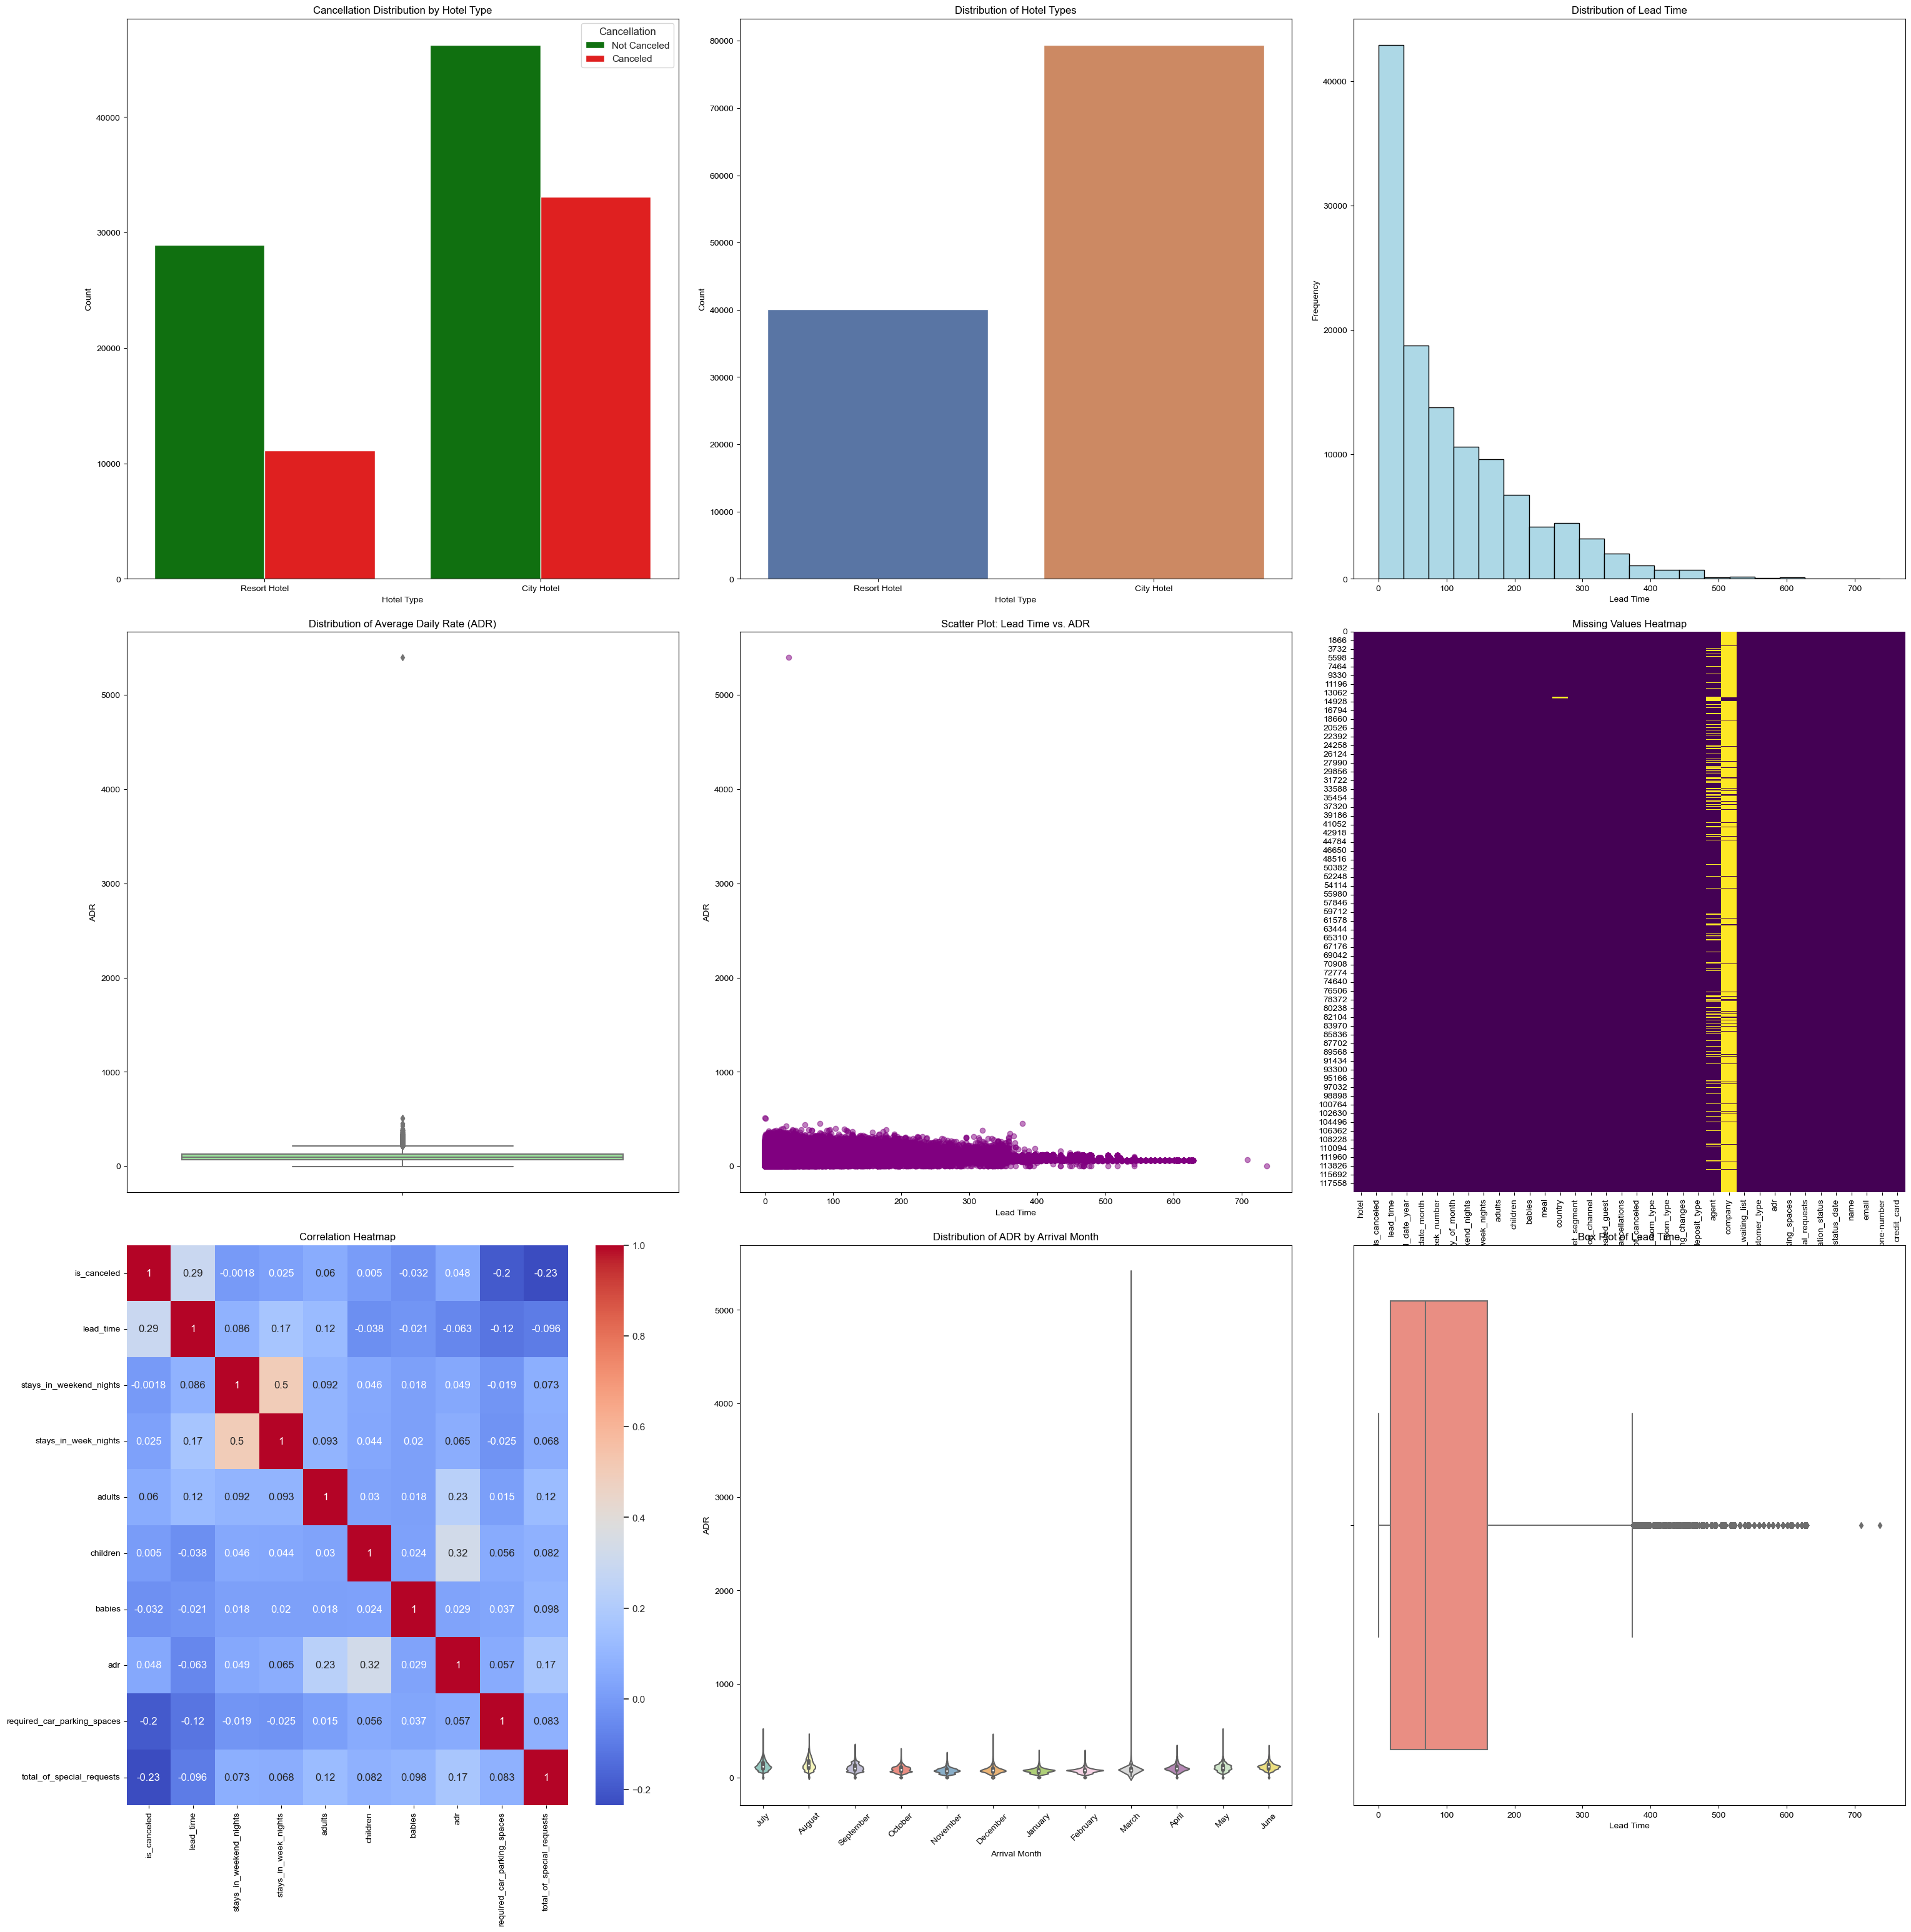

In [7]:
# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))
fig.tight_layout(pad=4.0)

# Set seaborn style
sns.set(style="whitegrid")

# Visualize cancellation distribution by hotel type
sns.countplot(x='hotel', hue='is_canceled', data=data, ax=axes[0, 0], palette=['green', 'red'])
axes[0, 0].set_title('Cancellation Distribution by Hotel Type')
axes[0, 0].set_xlabel('Hotel Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])

# Bar plot for categorical column 'hotel'
sns.countplot(x='hotel', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Hotel Types')
axes[0, 1].set_xlabel('Hotel Type')
axes[0, 1].set_ylabel('Count')

# Histogram for numerical column 'lead_time'
axes[0, 2].hist(data['lead_time'], bins=20, color='lightblue', edgecolor='black')
axes[0, 2].set_title('Distribution of Lead Time')
axes[0, 2].set_xlabel('Lead Time')
axes[0, 2].set_ylabel('Frequency')

# Box plot for numerical column 'adr'
sns.boxplot(y='adr', data=data, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribution of Average Daily Rate (ADR)')
axes[1, 0].set_ylabel('ADR')

# Scatter plot for relationship between 'lead_time' and 'adr'
axes[1, 1].scatter(data['lead_time'], data['adr'], alpha=0.5, color='purple')
axes[1, 1].set_title('Scatter Plot: Lead Time vs. ADR')
axes[1, 1].set_xlabel('Lead Time')
axes[1, 1].set_ylabel('ADR')

# Create a heatmap to visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', ax=axes[1, 2])
axes[1, 2].set_title('Missing Values Heatmap')

# Correlation heatmap for selected numerical columns
correlation_matrix = data[['is_canceled','lead_time', 'stays_in_weekend_nights', 
                           'stays_in_week_nights', 'adults', 
                           'children', 'babies', 'adr', 
                           'required_car_parking_spaces', 'total_of_special_requests']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[2, 0])
axes[2, 0].set_title('Correlation Heatmap')

# Violin Plot for 'arrival_date_month' and 'adr'
sns.violinplot(x='arrival_date_month', y='adr', data=data, ax=axes[2, 1], palette="Set3")
axes[2, 1].set_title('Distribution of ADR by Arrival Month')
axes[2, 1].set_xlabel('Arrival Month')
axes[2, 1].set_ylabel('ADR')
axes[2, 1].tick_params(axis='x', rotation=45)

# Box plot to visualize potential outliers in the 'lead_time'
sns.boxplot(x=data['lead_time'], ax=axes[2, 2], color='salmon')
axes[2, 2].set_title('Box Plot of Lead Time')
axes[2, 2].set_xlabel('Lead Time')

# Display the plots
plt.show()


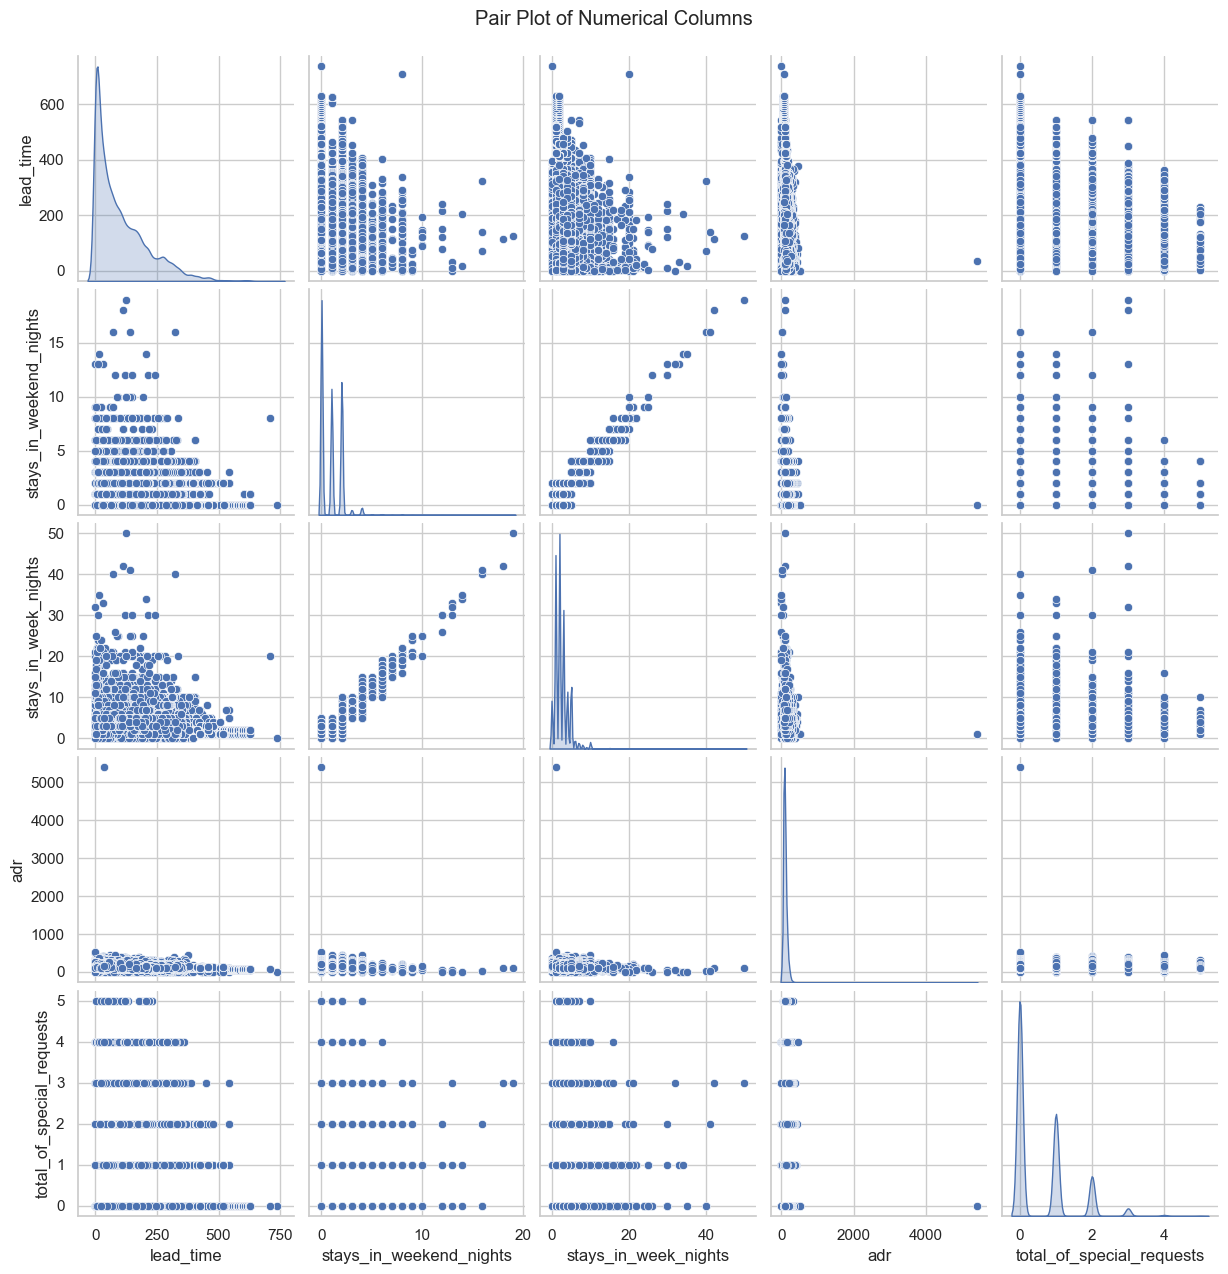

In [8]:
sns.pairplot(data[['lead_time', 'stays_in_weekend_nights', 
                   'stays_in_week_nights', 'adr', 'total_of_special_requests']], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()


In [9]:
# Create a donut plot function
def create_donut_plot(ax, categories, counts, title):
    ax.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90, pctdistance=0.85,
           wedgeprops={'edgecolor': 'gray'})
    ax.set_title(title)
    ax.axis('equal')


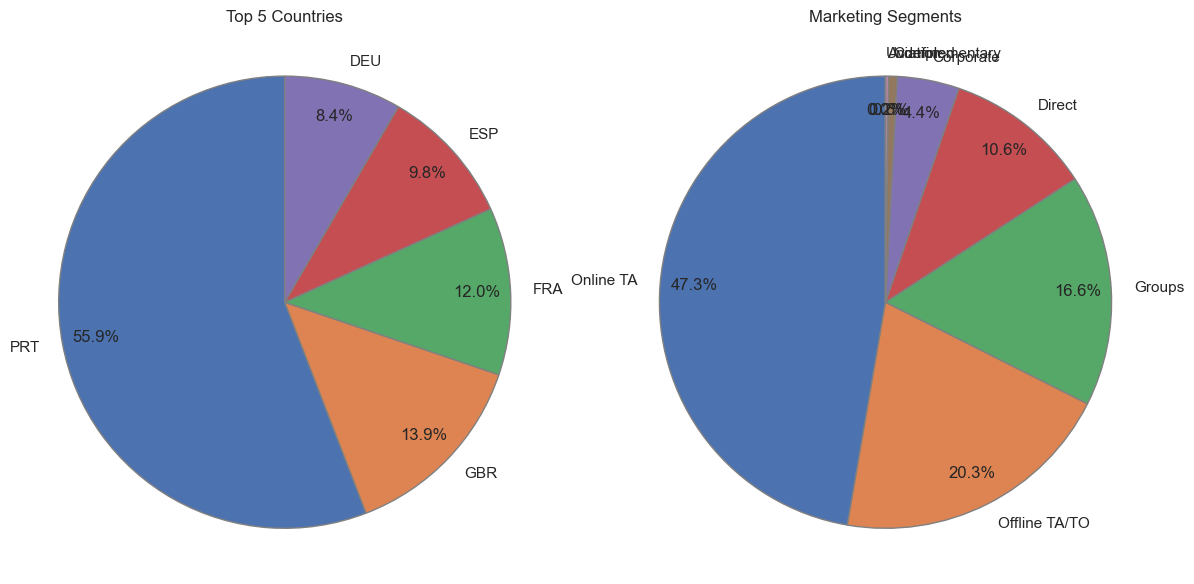

In [10]:
# Select the columns with categorical data
selected_columns = ['country', 'market_segment']

# Count the occurrences of each category for the 'country' column
country_counts = data[selected_columns[0]].value_counts()
top_countries = country_counts.head(5)

# Count the occurrences of each category for the 'marketing_segment' column
segment_counts = data[selected_columns[1]].value_counts()
top_segments = segment_counts.head(5)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Call the function with the top countries
create_donut_plot(axes[0], top_countries.index, top_countries.values, 
                  "Top 5 Countries")

# Call the function with the top marketing segments
create_donut_plot(axes[1], segment_counts.index, segment_counts.values, 
                  "Marketing Segments")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<div style="background-color: #f0f8ff; border: 2px solid #1e90ff; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #1e90ff; font-size: 20px;">Step 2: Apply preprocessing methods</h2>
    <ul style="list-style: none; padding-left: 0;">
    </ul>
</div>


In [11]:
# Drop Unneccessary columns
data = data.drop(columns=['company', 'agent', 'name', 'email', 
                          'phone-number', 'credit_card', 
                          'reservation_status', 'arrival_date_year'])

In [12]:
# Convert month to number of month
from dateutil import parser

def convert_month_to_number(month):
    dt = parser.parse(month)
    return dt.month

data['arrival_date_month'] = data['arrival_date_month'].apply(convert_month_to_number)

In [13]:
# Convert date to year, month, day, and weekday
def date_to_num_cols(date):
    # Convert the date series to datetime format
    date_series = pd.to_datetime(date)

    # Extract individual date features
    year = date_series.dt.year
    month = date_series.dt.month
    day = date_series.dt.day
    weekday = date_series.dt.weekday
    return (year, month, day, weekday)

In [14]:
date = data['reservation_status_date']
year, month, day, weekday = date_to_num_cols(date)

data['reserv_stat_month'] = month
data['reserv_stat_day'] = day
data['reserv_stat_weekday'] = weekday
data = data.drop(['reservation_status_date'], axis=1)

In [15]:
# For numerical column, use the mean value
imputer_child = SimpleImputer(strategy='mean')
data[['children']] = imputer_child.fit_transform(data[['children']])

# For categorical columns, replace missing values with a special category
data['country'].fillna('PRT', inplace=True)

# Define the categorical columns
label_encoder = LabelEncoder()
categorical_cols = ['hotel',  
                    'meal', 'country',
                    'reserved_room_type', 'assigned_room_type',
                    'market_segment', 'customer_type',
                    'distribution_channel', 'deposit_type']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
    
# Check the updated DataFrame
data[100:103].T

,100,101,102
hotel,1.00,1.00,1.00
is_canceled,0.00,0.00,0.00
lead_time,4.00,98.00,92.00
arrival_date_month,7.00,7.00,7.00
arrival_date_week_number,27.00,27.00,27.00
arrival_date_day_of_month,4.00,4.00,4.00
stays_in_weekend_nights,2.00,2.00,2.00
stays_in_week_nights,1.00,1.00,4.00
adults,2.00,2.00,1.00
children,0.00,0.00,2.00


In [16]:
# Separate features and target
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']

In [17]:
# Standard Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)

# Apply SMOTE to the preprocessed data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and validation sets
X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(X_resampled, 
                                                                                          y_resampled, 
                                                                                          test_size=0.3, 
                                                                                          random_state=42)

<div style="background-color: #f0f8ff; border: 2px solid #1e90ff; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #1e90ff; font-size: 20px;">Step 3: Choose a classification method</h2>
    <ul style="list-style: none; padding-left: 0;">
    </ul>
</div>

<div style="background-color: #fdf5e6; border: 2px solid #ff6347; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #ff6347; font-size: 16px;">Grid Search</h2>
</div>

In [19]:
def perform_grid_search(X, y, clf, params, scoring_list, cross_validation):
    """
    Performs grid search on the classifier using the given parameters.

    Parameters:
    X (array-like): The feature matrix.
    y (array-like): The target vector.
    clf (estimator): The classifier object.
    params (dict): The dictionary of hyperparameters to search over.
    scoring_list: The list of scoring functions (f1, recall, accuracy, ...)
    cross_validation(int): The integer number for spliting dataset.
    Returns:
    GridSearchCV: The grid search object.
    """

    for i in scoring_list:
        print(f'Scoring {i}: \n')
        
        gsh = GridSearchCV(clf, param_grid=params, scoring= i, 
                           cv=cross_validation, n_jobs=-1, verbose=1)
        gsh.fit(X, y)

        print(f'The best Estimators: {gsh.best_estimator_}')
        print("\033[1;43m"+27*'='+"\033[0m")
        print(f'The best Score: {gsh.best_score_}')
        print("\033[1;43m"+27*'='+"\033[0m")
        print(f'The best Parameters: {gsh.best_params_}')
        print("\033[1;41m"+50*'#'+"\033[0m")
    return gsh

### 1. KNearestNeighbor(KNN)

In [20]:
params = {
    'n_neighbors': [3, 5, 7, 11, 20],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}
cross_validation = 3

scoring_list = ['f1', 'accuracy', 'recall']
knn_clf = KNeighborsClassifier()
perform_grid_search(X, y, knn_clf, params, scoring_list, cross_validation)


Scoring f1: 

Fitting 3 folds for each of 40 candidates, totalling 120 fits
The best Estimators: KNeighborsClassifier()
The best Score: 0.6320082756003517
The best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
##################################################
Scoring accuracy: 

Fitting 3 folds for each of 40 candidates, totalling 120 fits
The best Estimators: KNeighborsClassifier(n_neighbors=11, weights='distance')
The best Score: 0.7692773362843703
The best Parameters: {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}
##################################################
Scoring recall: 

Fitting 3 folds for each of 40 candidates, totalling 120 fits
The best Estimators: KNeighborsClassifier(n_neighbors=3, weights='distance')
The best Score: 0.5868292629442559
The best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
##################################################


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 11, 20],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

### 2. RandomForest

In [21]:
params = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': [None, 'sqrt'],
    'max_depth': [None, 3, 5]
}
cross_validation = 3

scoring_list = ['f1', 'accuracy', 'recall']
rf_clf = RandomForestClassifier()
perform_grid_search(X, y, rf_clf, params, scoring_list, cross_validation)

Scoring f1: 

Fitting 3 folds for each of 24 candidates, totalling 72 fits
The best Estimators: RandomForestClassifier(max_features=None)
The best Score: 0.7547625319696379
The best Parameters: {'max_depth': None, 'max_features': None, 'n_estimators': 100}
##################################################
Scoring accuracy: 

Fitting 3 folds for each of 24 candidates, totalling 72 fits
The best Estimators: RandomForestClassifier(max_features=None, n_estimators=400)
The best Score: 0.8396768641563543
The best Parameters: {'max_depth': None, 'max_features': None, 'n_estimators': 400}
##################################################
Scoring recall: 

Fitting 3 folds for each of 24 candidates, totalling 72 fits
The best Estimators: RandomForestClassifier(max_features=None, n_estimators=400)
The best Score: 0.7160577393713997
The best Parameters: {'max_depth': None, 'max_features': None, 'n_estimators': 400}
##################################################


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5],
                         'max_features': [None, 'sqrt'],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='recall', verbose=1)

### 3. XGBoost

In [22]:
params = {
    'max_depth': [10,12],
    'alpha': [0.1],
    'subsample': [0.5,0.75],
    'learning_rate': [0.1, 0.5],
    'n_estimators': [10, 25]
    }
cross_validation = 3
xgb_clf = xgb.XGBClassifier(random_state=123)
perform_grid_search(X, y, xgb_clf, params, scoring_list, cross_validation)

Scoring f1: 

Fitting 3 folds for each of 16 candidates, totalling 48 fits
The best Estimators: XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)
The best Score: 0.9342212560989194
The best Parameters: {'alpha': 0.1, 'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 25, 'subsample': 0.5}
################

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=123, ...),
             n_jobs=-1,
             param_grid={'alpha': [0.1], 'learning_rate': [0.1, 0.5],
                         'max_depth': [10, 12], 'n_estimators': [10, 25],
                         'subsample': [0.5, 0.75]},
             scoring='recall', verbose=1)

<div style="background-color: #fdf5e6; border: 2px solid #ff6347; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #ff6347; font-size: 16px;">Perform with grid search results</h2>
</div>

In [23]:

# Create and fit Classifier
clf = RandomForestClassifier(n_estimators=300, random_state=42)

clf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(n_estimators=300, random_state=42)

<div style="background-color: #f0f8ff; border: 2px solid #1e90ff; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #1e90ff; font-size: 20px;">Step 4: Evaluate the chosen classifier</h2>
    <ul style="list-style: none; padding-left: 0;">
    </ul>
</div>

In [24]:
# Predict on validation data
y_pred = clf.predict(X_val_resampled)

# Evaluate the model
print(classification_report(y_val_resampled, y_pred))
print("\033[1;43m"+27*'='+"\033[0m")
print(confusion_matrix(y_val_resampled, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     22669
           1       0.99      0.95      0.97     22431

    accuracy                           0.97     45100
   macro avg       0.97      0.97      0.97     45100
weighted avg       0.97      0.97      0.97     45100

[[22459   210]
 [ 1024 21407]]
